In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/emilypickett/Documents/Medical Cost '

In [5]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'insurance.csv'), index_col = False)

### Data Cleaning

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Check for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing vaules

In [8]:
dups = df.duplicated()

In [11]:
dups.shape

(1338,)

no duplpicates

/var/folders/zk/lxc3sp7n5rqf4k_sl172k5xh0000gn/T/ipykernel_36706/3324589677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=25)


<Axes: xlabel='bmi', ylabel='Density'>

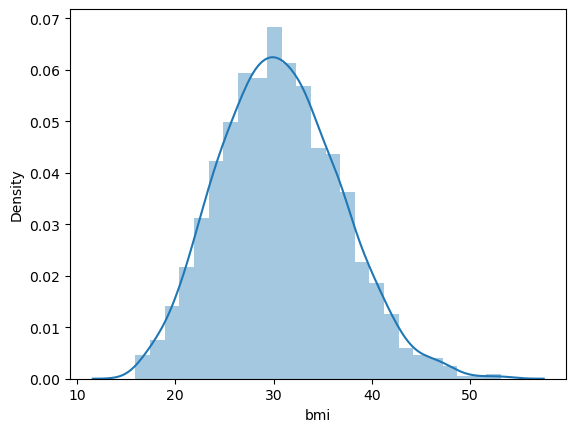

In [12]:
#extreme vaule of bmi 
sns.distplot(df['bmi'], bins=25)

In [13]:
df['bmi'].mean()

30.66339686098655

In [14]:
df['bmi'].median()

30.4

In [15]:
df['bmi'].max()

53.13

/var/folders/zk/lxc3sp7n5rqf4k_sl172k5xh0000gn/T/ipykernel_36706/305246067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins=25)


<Axes: xlabel='charges', ylabel='Density'>

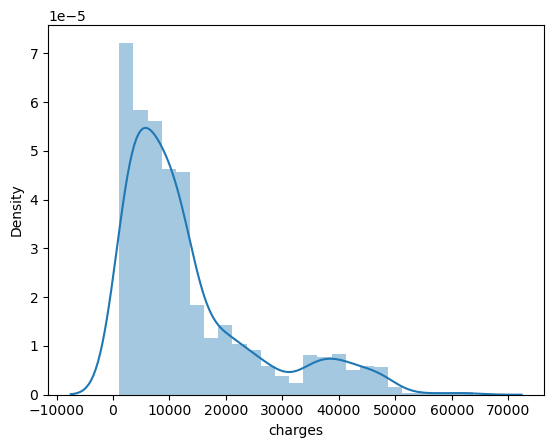

In [18]:
#extreme vaule of charges
sns.distplot(df['charges'], bins=25)

In [19]:
df['charges'].mean()

13270.422265141257

In [20]:
df['charges'].median()

9382.033

In [21]:
df['charges'].max()

63770.42801

### Prep for regression analysis

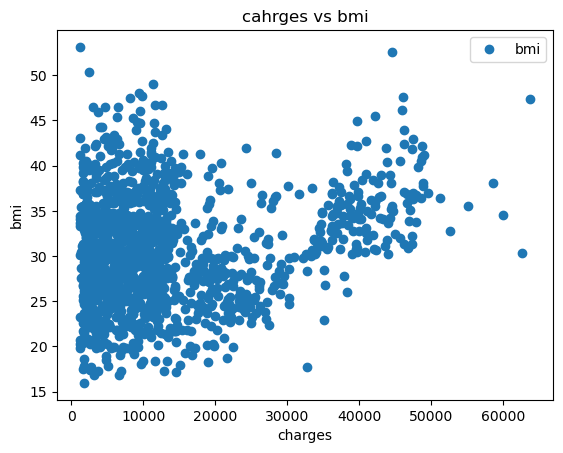

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'charges', y='bmi',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('charges vs bmi')  
plt.xlabel('charges')  
plt.ylabel('bmi')  
plt.show()

Hypothesis: higher the BMi the higher the charges 

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['charges'].values.reshape(-1,1)
y = df['bmi'].values.reshape(-1,1)

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [26]:
# Create a regression object.

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

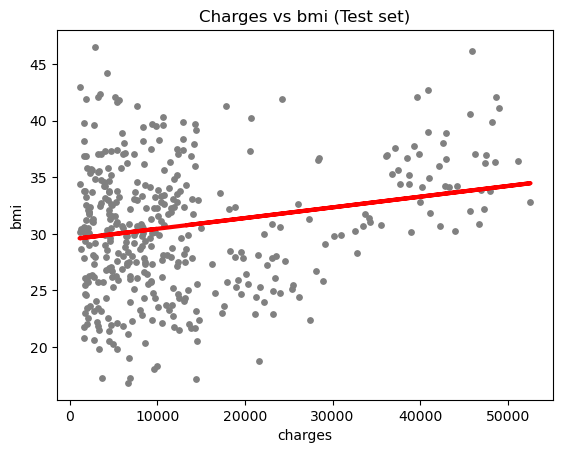

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Charges vs bmi (Test set)')
plot_test.xlabel('charges')
plot_test.ylabel('bmi')
plot_test.show()

The regression line did not hit all the data points

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [31]:
#  model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.46239264e-05]]
Mean squared error:  31.361908513306552
R2 score:  0.05493621832203077


The MSE is small compared to the data's variation of 0-50000. The R2 score is very close to zero meaning that it is not a good fit. 

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,30.200,30.420389
1,29.370,30.309032
2,40.565,33.824721
3,38.380,30.725603
4,18.050,30.412793
5,21.375,29.926056
6,26.315,29.708217
7,36.385,30.582405
8,30.210,30.213412
9,31.065,30.013553


Looking at the actual numbers there are some prediction that are very close to the actual but then there are some that are very far off, which explains the stats that the MSE showed it was a good fit but the R2 did not show that it was a good fit. Age might be another factor of why charges would increase.